# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [4]:
df1 = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [5]:
df1.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df1.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [9]:
df1.isnull().sum() #  any null values

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
count_question=df1['Bare Nuclei'].value_counts()['?']
print(count_question)

16


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [12]:
top_value=df1['Bare Nuclei'].describe(include='all').top
top_value

'1'

In [13]:
df1.replace(to_replace ="?",value='1',inplace=True)

In [14]:
df1['Bare Nuclei']=pd.to_numeric(df1['Bare Nuclei'])

In [17]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
669    False
670    False
671    False
672    False
673    False
674    False
675    False
676    False
677    False
678    False
679    False
680    False
681    False
682    False
683    False
684     True
685    False
686    False
687    False
688    False
689    False
690    False
691    False
692    False
693    False
694    False
695    False
696    False
697    False
698    False
Length: 699, dtype: bool

In [20]:
df1.drop_duplicates(inplace=True)

In [21]:
df1.info() # 9 duplicate records have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [16]:
df1.corr() # Cell size has a strong coorelation with cell shape and strong predictor of class as well
# Cell shape has a strong coorelation with cell size and strong predictor of class as well
#Bare Nuclei,Normal Nucleoli and ClumpThickness are good predictor of class as well


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


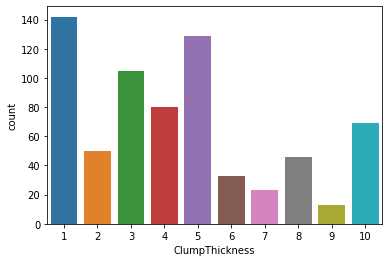

In [22]:
sns.countplot('ClumpThickness',data=df1) # count plot

In [23]:
df1['ClumpThickness'].value_counts()

1     142
5     129
3     105
4      80
10     69
2      50
8      46
6      33
7      23
9      13
Name: ClumpThickness, dtype: int64

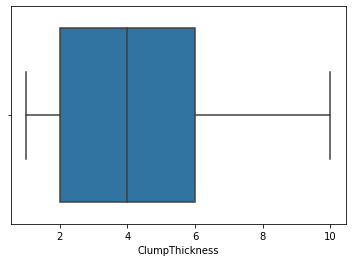

In [25]:
sns.boxplot(x='ClumpThickness',data=df1) # no outliers

In [26]:
df1['ClumpThickness'].describe() # mean is more than median so right skewed

count    690.000000
mean       4.428986
std        2.817378
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ClumpThickness, dtype: float64

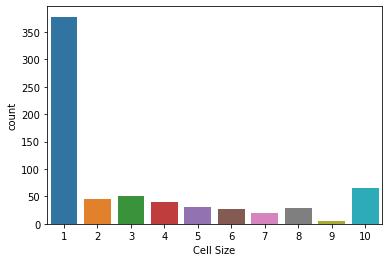

In [27]:
sns.countplot('Cell Size',data=df1)

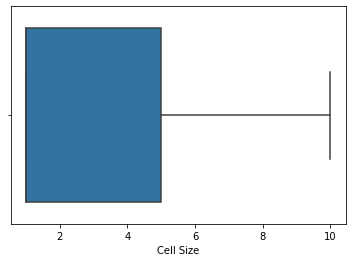

In [28]:
sns.boxplot(x='Cell Size',data=df1) # no outliers

In [29]:
df1['Cell Size'].describe() # mean is more than meadin so right skewed

count    690.000000
mean       3.133333
std        3.042451
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Cell Size, dtype: float64

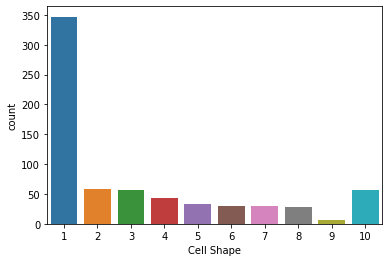

In [30]:
sns.countplot('Cell Shape',data=df1)

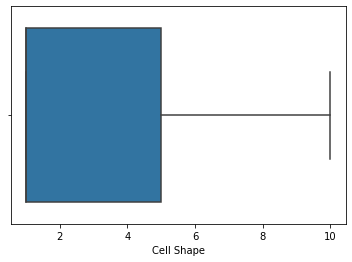

In [31]:
sns.boxplot(x='Cell Shape',data=df1) # no outliers

In [32]:
df1['Cell Shape'].describe() # mean is more than median so its right skewed

count    690.000000
mean       3.204348
std        2.960844
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Cell Shape, dtype: float64

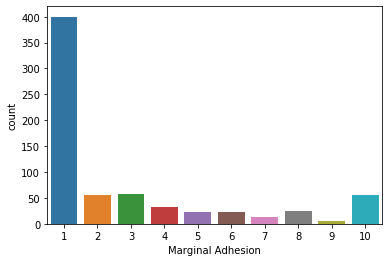

In [33]:
sns.countplot('Marginal Adhesion',data=df1)

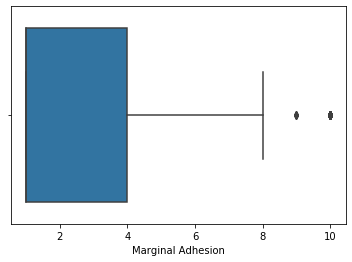

In [34]:
sns.boxplot(x='Marginal Adhesion',data=df1) # it has outliers

In [37]:
pd.crosstab(df1['Marginal Adhesion'],df1['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [35]:
df1['Marginal Adhesion'].describe() # right skewed

count    690.000000
mean       2.827536
std        2.867787
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Marginal Adhesion, dtype: float64

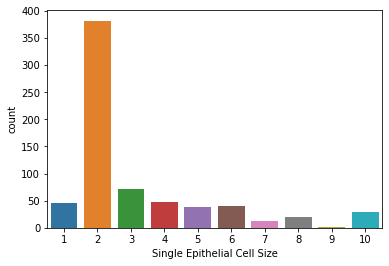

In [38]:
sns.countplot('Single Epithelial Cell Size',data=df1)

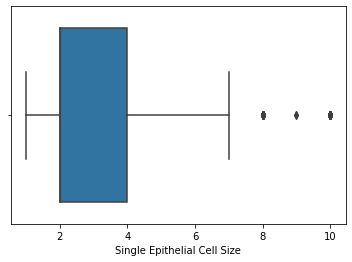

In [63]:
sns.boxplot(x='Single Epithelial Cell Size',data=df1) # its has out liers

In [40]:
df1['Single Epithelial Cell Size'].describe() # mean is more than median so right skewed

count    690.000000
mean       3.213043
std        2.200964
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Single Epithelial Cell Size, dtype: float64

In [41]:
pd.crosstab(df1['Single Epithelial Cell Size'],df1['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


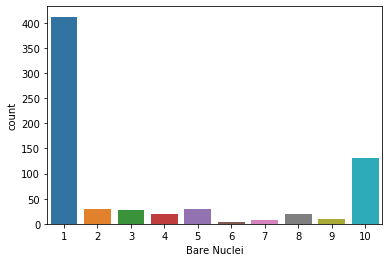

In [42]:
sns.countplot('Bare Nuclei',data=df1)

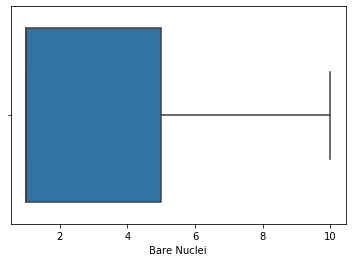

In [43]:
sns.boxplot(x='Bare Nuclei',data=df1) # no ouliers

In [44]:
df1['Bare Nuclei'].describe() 3 Right skewed

count    690.000000
mean       3.482609
std        3.617064
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Bare Nuclei, dtype: float64

In [45]:
pd.crosstab(df1['Bare Nuclei'],df1['Class'])

Class,2,4
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


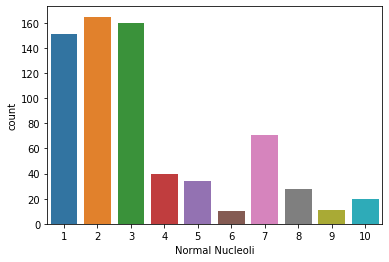

In [46]:
sns.countplot('Normal Nucleoli',data=df1)

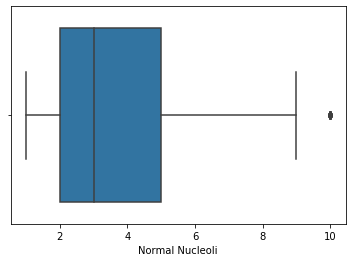

In [47]:
sns.boxplot(x='Normal Nucleoli',data=df1) # has outliers

In [48]:
df1['Normal Nucleoli'].describe() # right skewed

count    690.000000
mean       3.436232
std        2.444060
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Normal Nucleoli, dtype: float64

In [49]:
pd.crosstab(df1['Normal Nucleoli'],df1['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


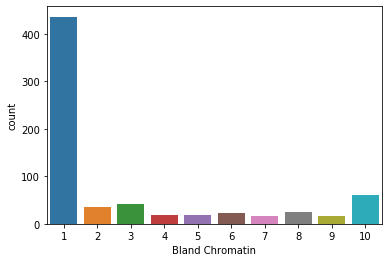

In [50]:
sns.countplot('Bland Chromatin',data=df1)

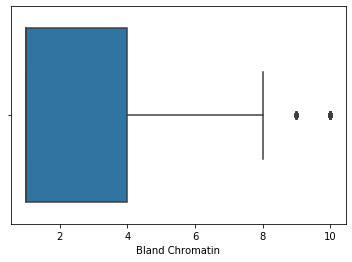

In [51]:
sns.boxplot(x='Bland Chromatin',data=df1) # has  outliers

In [52]:
df1['Bland Chromatin'].describe() # right skewed 

count    690.000000
mean       2.885507
std        3.067682
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Bland Chromatin, dtype: float64

In [53]:
pd.crosstab(df1['Bland Chromatin'],df1['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


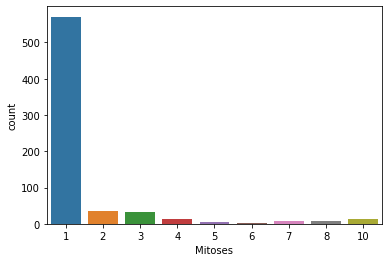

In [54]:
sns.countplot('Mitoses',data=df1)

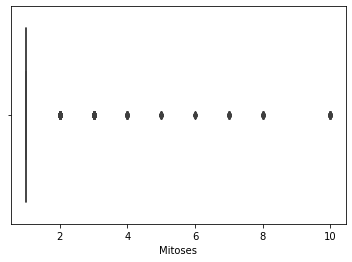

In [56]:
sns.boxplot(x='Mitoses',data=df1) # has outlers

In [57]:
df1['Mitoses'].describe() # right skewed

count    690.000000
mean       1.594203
std        1.724230
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: Mitoses, dtype: float64

In [58]:
pd.crosstab(df1['Mitoses'],df1['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


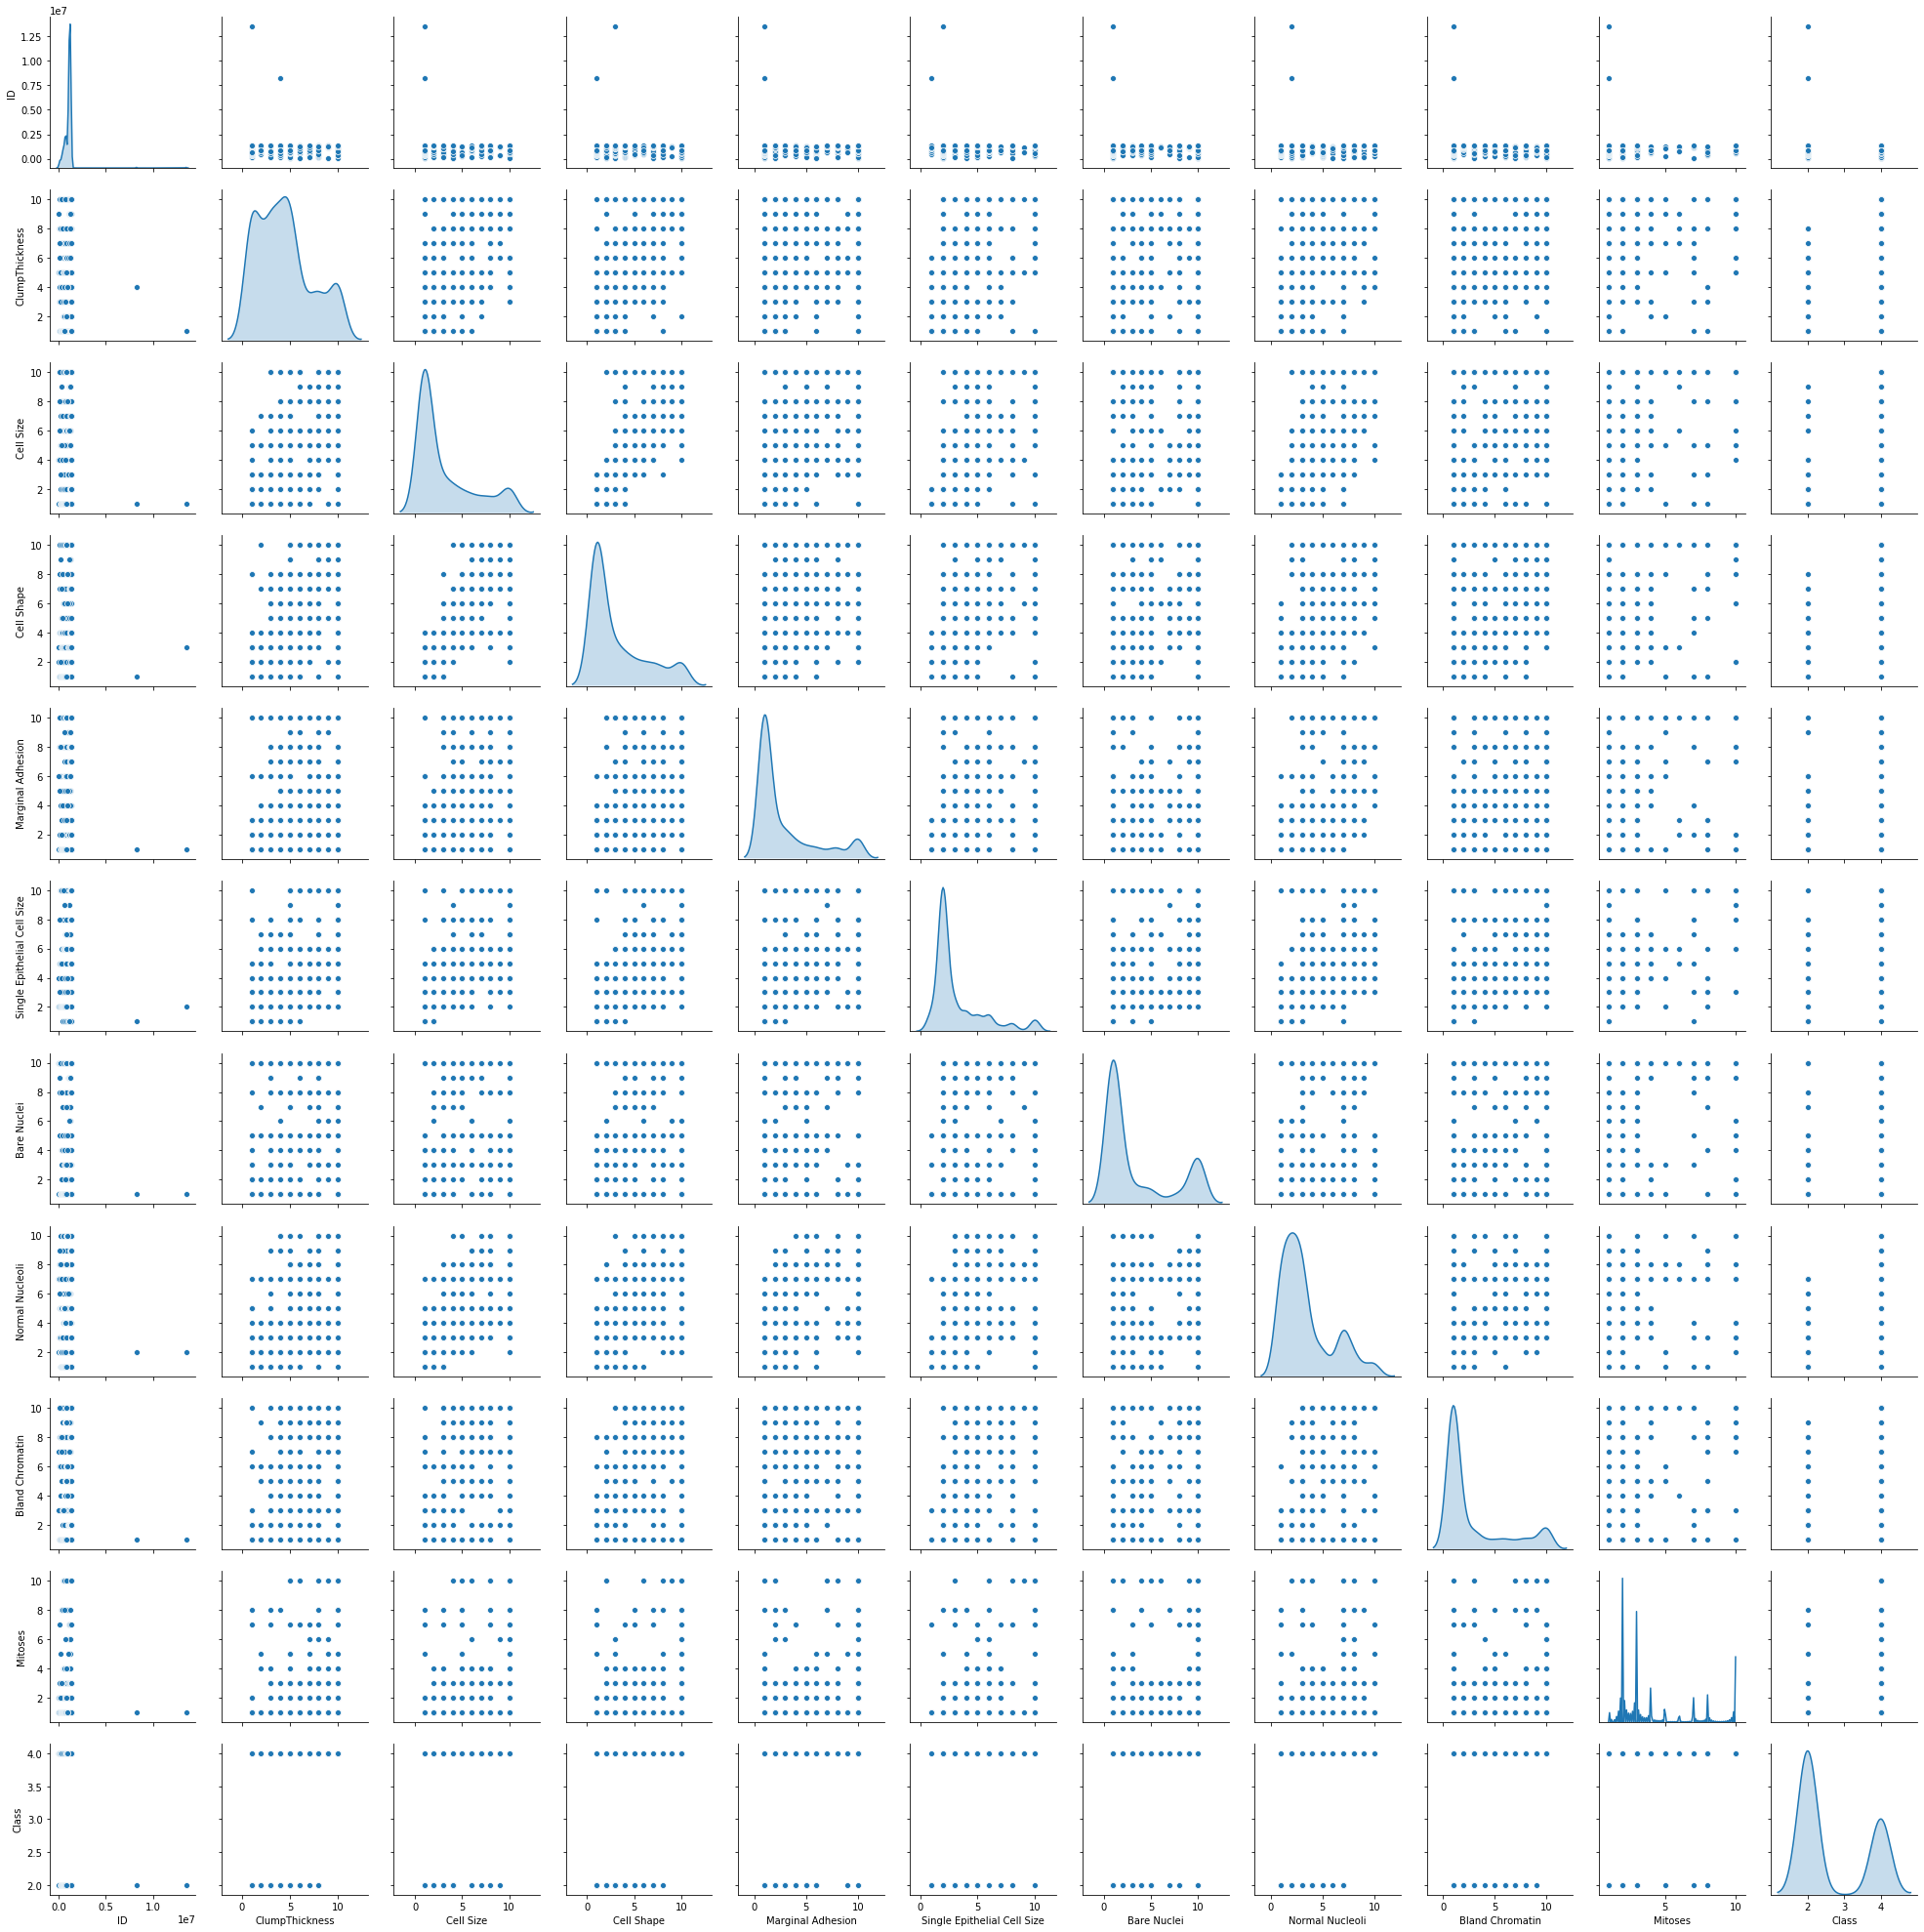

In [60]:
sns.pairplot(df1,diag_kind='kde')

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [61]:
df1=df1.drop(labels='ID',axis=1) # drop id

In [62]:
df1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [67]:
df1['Single Epithelial Cell Size']=np.where(df1['Single Epithelial Cell Size']>7,4,df1['Single Epithelial Cell Size'])

In [68]:
df1['Marginal Adhesion']=np.where(df1['Marginal Adhesion']>8,4,df1['Marginal Adhesion'])

In [69]:
df1['Normal Nucleoli']=np.where(df1['Normal Nucleoli']>9,5,df1['Normal Nucleoli'])

In [70]:
df1['Bland Chromatin']=np.where(df1['Bland Chromatin']>8,4,df1['Bland Chromatin'])

In [71]:
df1['Mitoses']=np.where(df1['Mitoses']>1,1,df1['Mitoses'])

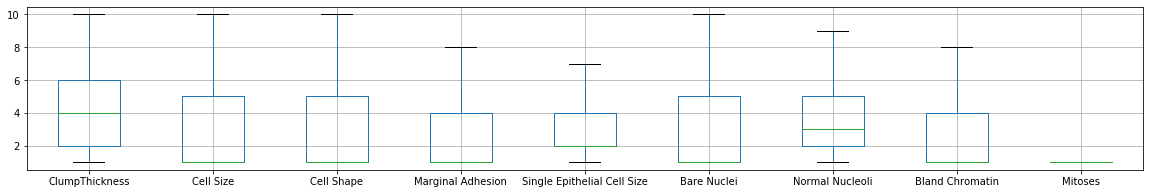

In [73]:
clmn=['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses']
df1.boxplot(figsize=(20,3),column=clmn)

In [0]:
# We could see most of the outliers are now removed.

C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


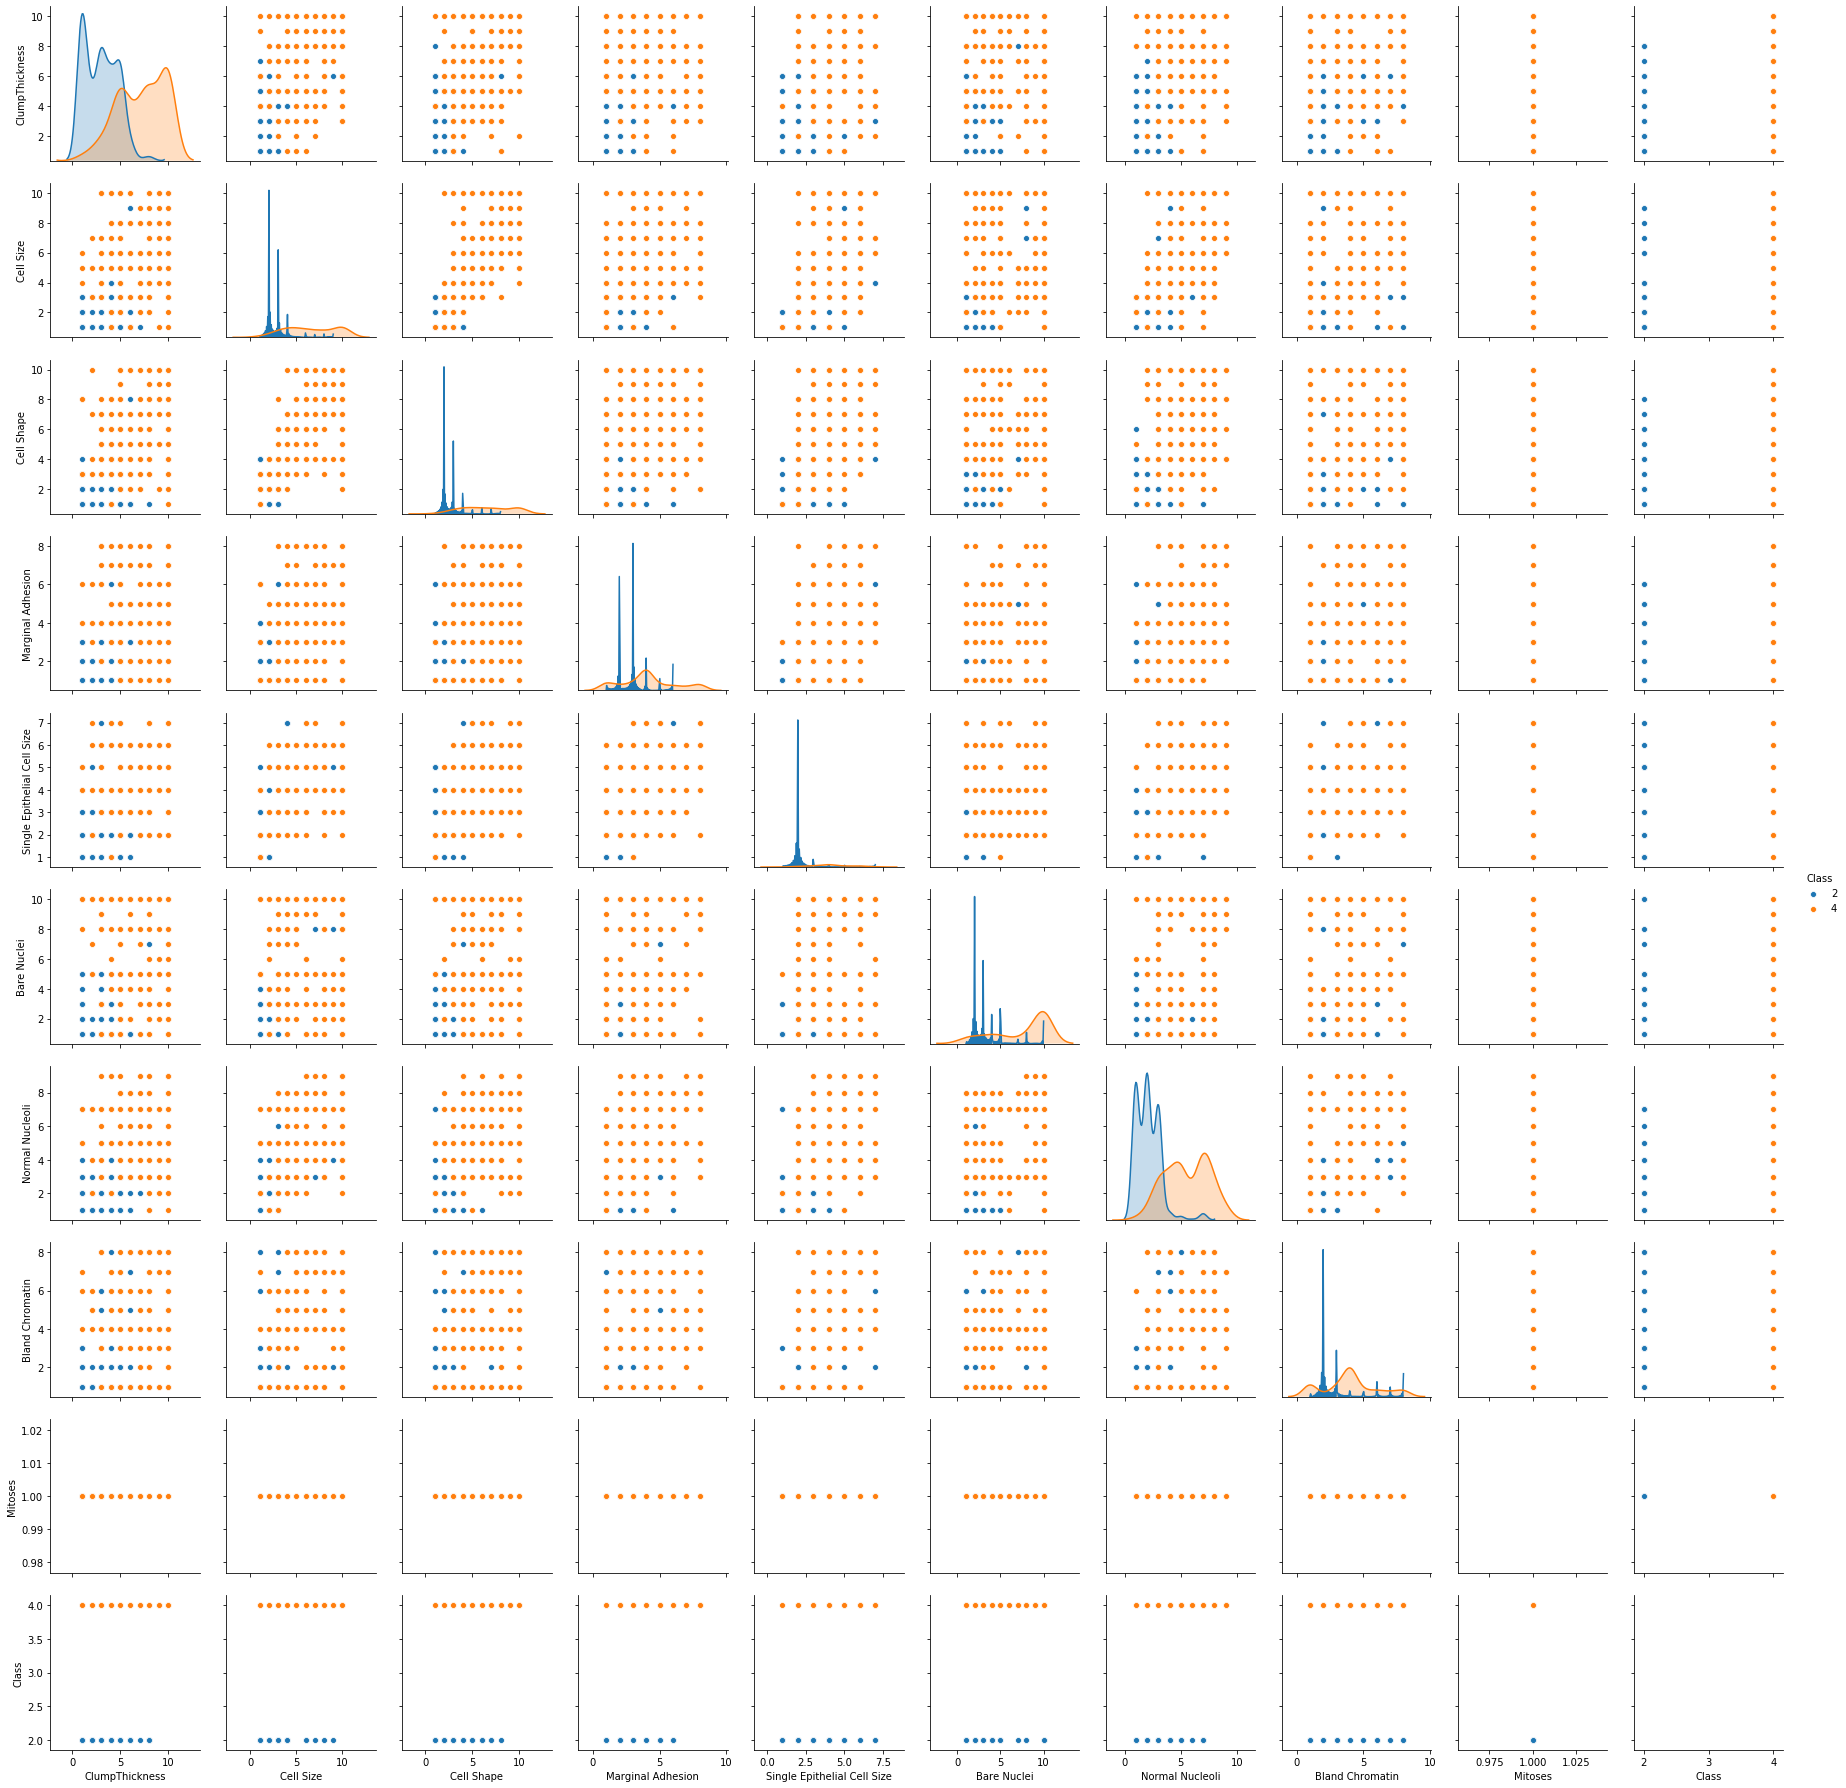

In [75]:
sns.pairplot(df1 , hue='Class' , diag_kind = 'kde')

# Q6 Create a covariance matrix for identifying Principal components

In [76]:
X=df1.drop(['Class'],axis=1) # Independent Features are assigned to X

y=df1['Class'] #target is assigned to y

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [79]:
cov_matrix = np.cov(X_train_std.T) # covariance matrix

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00207469 0.65815102 0.6524644  0.50962253 0.54378898 0.58200771
  0.57474624 0.53647175 0.        ]
 [0.65815102 1.00207469 0.92164519 0.71307143 0.73437551 0.67201585
  0.72170268 0.68299678 0.        ]
 [0.6524644  0.92164519 1.00207469 0.68952365 0.7216712  0.70487512
  0.72288294 0.664854   0.        ]
 [0.50962253 0.71307143 0.68952365 1.00207469 0.64696504 0.65380419
  0.67577235 0.6058711  0.        ]
 [0.54378898 0.73437551 0.7216712  0.64696504 1.00207469 0.61748275
  0.61961673 0.65156292 0.        ]
 [0.58200771 0.67201585 0.70487512 0.65380419 0.61748275 1.00207469
  0.67612727 0.6010567  0.        ]
 [0.57474624 0.72170268 0.72288294 0.67577235 0.61961673 0.67612727
  1.00207469 0.64055737 0.        ]
 [0.53647175 0.68299678 0.664854   0.6058711  0.65156292 0.6010567
  0.64055737 1.00207469 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [80]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix) #Get eigen values and eigen vector
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals) 

Eigen Vectors 
%s [[ 0.31592045  0.02104086 -0.85754756  0.02223061  0.11314197 -0.08903067
  -0.37224058  0.06766772  0.        ]
 [ 0.38670945 -0.71542002 -0.05318579  0.16887999 -0.36625171  0.26415125
   0.20013302 -0.25161756  0.        ]
 [ 0.38513617  0.68908542 -0.07731031  0.09993074 -0.36112729  0.27803569
   0.33766078 -0.19783024  0.        ]
 [ 0.34628786  0.06165293  0.38761679 -0.33307373 -0.19583799  0.20998005
  -0.72946063 -0.02327661  0.        ]
 [ 0.34901163  0.01657356  0.21954162  0.45932989 -0.24550411 -0.54320984
  -0.03278859  0.51216153  0.        ]
 [ 0.34649866 -0.08871589  0.00291941 -0.54433201  0.22830025  0.18719538
   0.38097898  0.58604967  0.        ]
 [ 0.35510438 -0.0056435   0.10138639 -0.35273016  0.20625487 -0.62763639
   0.16374707 -0.52525199  0.        ]
 [ 0.33828296  0.03024293  0.2169644   0.46729139  0.72757048  0.27722863
  -0.04714794 -0.10381607  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [81]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.12065133  76.68807221  82.19608854  87.17251939  91.46376572
  95.48544136  99.0433627  100.         100.        ]


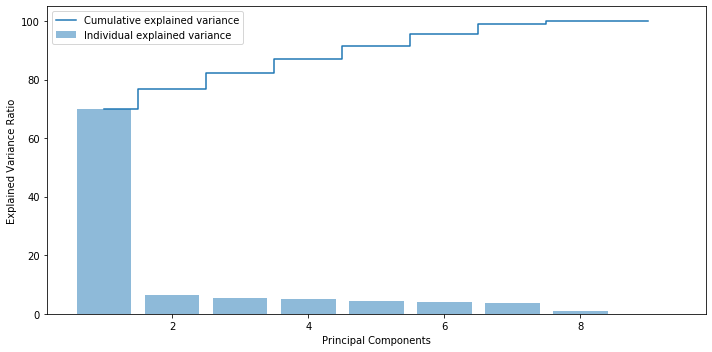

In [99]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

In [94]:
X_centered = X - X.mean(axis=0)

In [96]:

pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
X_pca = pca.transform(X_centered)

In [98]:
X_pca.shape

(690, 7)

# Q10 Find correlation between components and features

In [131]:
df_comp=pd.DataFrame(pca.components_,columns=list(X_centered.columns))

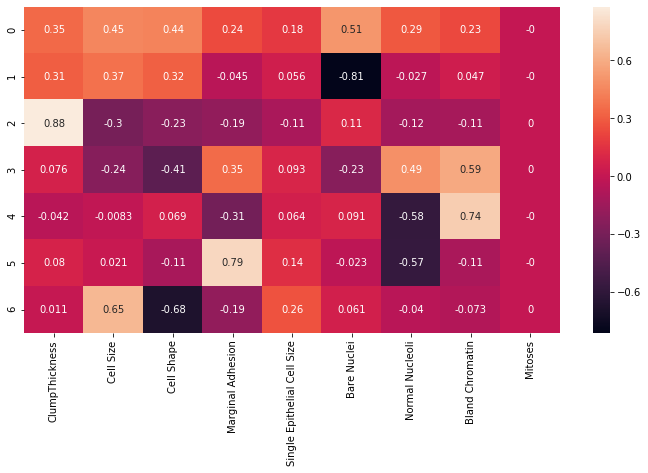

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [122]:
df2 = pd.read_csv("jokes.csv")

In [123]:
df2.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [124]:
df3 = df2.iloc[0:200,0:] # new data frame

In [125]:
df3.shape

(200, 101)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [126]:
df3.replace(to_replace =99.00,value=0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [127]:
df3.drop(labels=['NumJokes'],inplace=True,axis=1)

In [128]:
rating_mean=df3.mean()

In [129]:
rating_mean.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64